# Import packages

In [1]:
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
from tqdm import tqdm
from matplotlib.ticker import AutoMinorLocator
import os as os
import pickle
import time
from sklearn.linear_model import Ridge
import numpy as np
import math
import statistics
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import matplotlib.ticker as ticker
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel, RBF, ConstantKernel, Matern
from sklearn.gaussian_process import GaussianProcessRegressor
from xgboost import XGBRegressor
from tqdm import tqdm
from matplotlib.colors import ListedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import MaxNLocator 
from matplotlib import cm
import matplotlib.ticker as plticker 
import matplotlib.patches as patches
from matplotlib.cm import ScalarMappable
from matplotlib.lines import Line2D
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from textwrap import wrap
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
np.float=float
def get_score(base='Training', actual=0,predicted=0):
    r2 = r2_score(actual,predicted)
    mae = mean_absolute_error(actual,predicted)
    mse = mean_squared_error(actual,predicted)
    # print(base,r2.round(2),mae.round(3),mse.round(3))
    return r2.round(2)

In [ ]:
import subprocess
from new_plot import * #This line is throwing an error #Solved by commenting out some of the keys of rcParams()

# Read data

In [2]:
d1 = pd.read_excel(r'Results for Histogram.xlsx', sheet_name='Dataset-1').iloc[0:6,1:]
d2 = pd.read_excel(r'Results for Histogram.xlsx', sheet_name='Dataset-2').iloc[0:6,1:]
d3 = pd.read_excel(r'Results for Histogram.xlsx', sheet_name='Dataset-3').iloc[0:6,1:]
d4 = pd.read_excel(r'Results for Histogram.xlsx', sheet_name='Dataset-4').iloc[0:6,1:]
d5 = pd.read_excel(r'Results for Histogram.xlsx', sheet_name='Dataset-5').iloc[0:6,1:]
d6 = pd.read_excel(r'Results for Histogram.xlsx', sheet_name='Dataset-6').iloc[0:6,1:]
d7 = pd.read_excel(r'Results for Histogram.xlsx', sheet_name='Dataset-7').iloc[0:6,1:]
d237 = pd.read_excel(r'Results for Histogram.xlsx', sheet_name='Dataset-8').iloc[0:6,1:7]

# Defining functions for radar

In [3]:
s =19
def add_labels(angles, values, labels, offset, ax):
    
    # This is the space between the end of the bar and the label
    padding = 2
    
    # Iterate over angles, values, and labels, to add all of them.
    for angle, value, label, in zip(angles, values, labels):
        angle = angle
        
        # Obtain text rotation and alignment
        rotation, alignment = get_label_rotation(angle)

        # And finally add the text
        ax.text(
            x=angle, 
            y=value + padding, 
            s=label, 
            ha=alignment, 
            va="center", 
            rotation=rotation, 
            rotation_mode="anchor",
            fontsize = s, 
            fontweight = 'normal'
        ) 
###############   if we are using clockwise diriction (ax.set_theta_direction(-1)) of theta
def get_label_rotation(angle):
    # Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)
    if angle <= np.pi:
        alignment = "left"
        rotation = 90 - rotation
    else: 
        alignment = "right"
        rotation = 270 - rotation
    return rotation, alignment

###############  if we are using by default anticlockwise direction of theta
# def get_label_rotation(angle, offset):
#     # Rotation must be specified in degrees :(
#     rotation = np.rad2deg(angle + offset)
#     if angle <= np.pi:
#         alignment = "right"
#         rotation = rotation + 180
#     else: 
#         alignment = "left"
#     return rotation, alignment

In [4]:
def radar237(df, name,value, group,min, max,i, dataset):
    if max == 0:
        label = [0,0,0,0,0,0]
        min =0
        max = 1
        top = 0
    else:
        label = value.copy()
        top = 1
    PAD = 1   # represents the number of empty bars between differetn classes of bars. Set to 0, if only 1 class of bars
    ANGLES = np.linspace(0, 2 * np.pi, len(df), endpoint=False)
    VALUES = df["value"].values
    LABELS = df["name"].values
    OFFSET = np.pi / 2   # can keep 1.2 * np.pi / 2 for continious plot
    GROUP = df["group"].values
    ANGLES_N = len(VALUES) + PAD * len(np.unique(GROUP))
    ANGLES = np.linspace(0, 2 * np.pi, num=ANGLES_N, endpoint=False)
    WIDTH = (2 * np.pi) / len(ANGLES)
    GROUPS_SIZE = [len(i[1]) for i in df.groupby("group")]
    offset = 0
    IDXS = []
    for size in GROUPS_SIZE:
        IDXS += list(range(offset + PAD, offset + size + PAD))
        offset += size + PAD
    _=fig, ax = plt.subplots(figsize=(6,6), subplot_kw={"projection": "polar"})
    _=fig.patch.set_facecolor("white")
    _=ax.set_facecolor("white")
    _=ax.set_theta_offset(OFFSET)

    ############# change direction of angles to clockwise 
    theta_direction = ax.set_theta_direction(-1)

    ############### If no X and Y labels are required, pass empty list
    _= ax.set_xticks([])
    _= ax.set_yticks([])

    ###########Use different colors for each group of bar
    GROUPS_SIZE = [len(i[1]) for i in df.groupby("group")]
    COLORS = ['green' if value[i] >0 else 'red' for i in range(len(value))]
    # COLORS = ['green' for i in range(5)]+['red' for i in range(5)]+ ['blue' for i in range(5)]
    ########### Ploting the bars
    _=ax.bar(
        ANGLES[IDXS], VALUES, width=WIDTH, color='white', 
        edgecolor=COLORS, linewidth=1.5, alpha = 1, zorder = 1   # keep zorder highest so that bar lies above the gridlines
    )
    _=ax.bar(
        ANGLES[IDXS], VALUES, width=WIDTH, color=COLORS, 
        edgecolor=COLORS, linewidth=0, alpha = 0.2, zorder = 2   # keep zorder highest so that bar lies above the gridlines
    )
    offset
    ################### Add label to each bar individually at its top,    its padding given in the function itself
    # add_labels(ANGLES[IDXS], VALUES, VALUES, OFFSET, ax)

    ################## Add arch below each arch for separating the group
    # offset = 0 
    # for group, size in zip(["A", "B", "C"], GROUPS_SIZE):
    #     # Add line below bars
    #     x1 = np.linspace(ANGLES[offset + PAD], ANGLES[offset + size + PAD - 1], num=50)
    #     ax.plot(x1, [-0.5] * 50, color="#333333")
        
    ###############Add text to indicate group within the inner circle 
    #     _=ax.text(
    #         np.mean(x1), -2, group, color="#333333", fontsize=s, 
    #         fontweight="normal", ha="center", va="center"
    #     )

    ############### Adding vertial line along polar diredtiion
    _=ax.vlines(ANGLES[IDXS], 0, 1, color='black', ls=(5,(10,3)), zorder=10, linewidth =0.8)

    ###### Adding x labels on ANGLES along the outer circumferene
    _= ax.set_xticks(ANGLES[IDXS])
    # LABELS = [f'{group[0]}\n({value[0]})',f'{group[1]}\n({value[1]})', f'{group[2]}\n({value[2]})', f'{group[3]}\n({value[3]})', f'{group[4]}\n({value[4]})', f'{group[5]}\n({value[5]})' ]
    LABELS = [f'{group[0]}\n({value[0]})',f'{group[1]}\n({value[1]})', f'{group[2]}\n({value[2]})', f'{group[3]}\n({value[3]})' ]
    _= ax.set_xticklabels(LABELS, size=25, fontweight = 'bold')
    XTICKS = ax.xaxis.get_major_ticks()
    for tick in XTICKS:
        _=tick.set_pad(21)


    ###############   y label settings
    _=ax.set_frame_on(True)
    matplotlib.rcParams['axes.linewidth'] = 0.5  # spine(frame) width
    _=ax.spines["polar"].set_color("black")  # outer most reference line on spine when frame on is True
    _=ax.set_ylim(min, max)
    _=ax.xaxis.grid(False)
    _=ax.yaxis.grid(True,linestyle = '-', linewidth = 1)#, linestyle = '--', linewidth = 1 # sets referece lines along y direction #

    ########## inbuilt y ticks
    # _= ax.set_yticklabels([])
    # _= ax.set_xticklabels([])

    ######  custom y ticks on any radial lline
    _= PAD = 1
    # if i <3:
    #     X = [-20,-10,0,1]
    #     _= ax.set_yticks(X,X, fontsize = 0, fontweight = 'normal', zorder =0)  # Ads a referece circle on y tick values when y axis grid is turned True. Font = 0 for only showing the circle
    #     _= ax.text(0, -20 , "-20", ha="center", size=25, fontweight = 'normal', zorder = 3, color = 'gray')
    #     _= ax.text(-0.1, -10 , "-10", ha="center", size=25, fontweight = 'normal', zorder = 3, color = 'gray')
    #     _= ax.text(-0.15, 0 , "0", ha="center", size=25, fontweight = 'normal', zorder = 3, color = 'gray') # custon labels to y ticks (reference lines of grid)
    #     _= ax.text(-0.35, 1 , "1", ha="center", size=25, fontweight = 'normal', zorder = 3, color = 'gray')
        
        
        
    # else:
    X = [0,0.5,1]
    _= ax.set_yticks(X,X, fontsize = 0, fontweight = 'normal', zorder =0)  # Ads a referece circle on y tick values when y axis grid is turned True. Font = 0 for only showing the circle
    _= ax.text(0, 0 , "0", ha="center", size=25, fontweight = 'normal', zorder = 3, color = 'gray') # custon labels to y ticks (reference lines of grid)
    _= ax.text(0,0.5 , "0.5", ha="center", size=25, fontweight = 'normal', zorder = 3, color = 'gray')
    _= ax.text(0, 1 , "1", ha="center", size=25, fontweight = 'normal', zorder = 3, color = 'gray')
    # _= ax.text(-0.2 * np.pi / 2, 10 + PAD, "10", ha="center", size=12)
    # _= ax.text(-0.2 * np.pi / 2, 20 + PAD, "20", ha="center", size=12)
    plt.savefig(f'./notebook_figures/radar/D{dataset}/radar{i+1}.tiff',format='tiff', dpi=1200)
    _=plt.show()


In [13]:
def radar(df, name,value, group,min, max,i, dataset):
    if max == 0:
        label = [0,0,0,0,0,0]
        min =0
        max = 1
        top = 0
    else:
        label = value.copy()
        top = 1
    PAD = 1   # represents the number of empty bars between differetn classes of bars. Set to 0, if only 1 class of bars
    ANGLES = np.linspace(0, 2 * np.pi, len(df), endpoint=False)
    VALUES = df["value"].values
    LABELS = df["name"].values
    OFFSET = np.pi / 2   # can keep 1.2 * np.pi / 2 for continious plot
    GROUP = df["group"].values
    ANGLES_N = len(VALUES) + PAD * len(np.unique(GROUP))
    ANGLES = np.linspace(0, 2 * np.pi, num=ANGLES_N, endpoint=False)
    WIDTH = (2 * np.pi) / len(ANGLES)
    GROUPS_SIZE = [len(i[1]) for i in df.groupby("group")]
    offset = 0
    IDXS = []
    for size in GROUPS_SIZE:
        IDXS += list(range(offset + PAD, offset + size + PAD))
        offset += size + PAD
    _=fig, ax = plt.subplots(figsize=(2,2), subplot_kw={"projection": "polar"})
    _=fig.patch.set_facecolor("white")
    _=ax.set_facecolor("white")
    _=ax.set_theta_offset(OFFSET)

    ############# change direction of angles to clockwise 
    theta_direction = ax.set_theta_direction(-1)

    ############### If no X and Y labels are required, pass empty list
    _= ax.set_xticks([])
    _= ax.set_yticks([])

    ###########Use different colors for each group of bar
    GROUPS_SIZE = [len(i[1]) for i in df.groupby("group")]
    COLORS = ['green' if value[i] >0 else 'white' for i in range(len(value))]
    # COLORS = ['green' for i in range(5)]+['red' for i in range(5)]+ ['blue' for i in range(5)]
    ########### Ploting the bars
    if top != 0:
        _=ax.bar(
            ANGLES[IDXS], VALUES, width=WIDTH, color='white', 
            edgecolor=COLORS, linewidth=1.5, alpha = 1, zorder = 1   # keep zorder highest so that bar lies above the gridlines
        )

        _=ax.bar(
            ANGLES[IDXS], VALUES, width=WIDTH, color=COLORS, 
            edgecolor=COLORS, linewidth=0, alpha = 0.2, zorder = 2   # keep zorder highest so that bar lies above the gridlines
        )
    offset
    ################### Add label to each bar individually at its top,    its padding given in the function itself
    # add_labels(ANGLES[IDXS], VALUES, VALUES, OFFSET, ax)

    ################## Add arch below each arch for separating the group
    # offset = 0 
    # for group, size in zip(["A", "B", "C"], GROUPS_SIZE):
    #     # Add line below bars
    #     x1 = np.linspace(ANGLES[offset + PAD], ANGLES[offset + size + PAD - 1], num=50)
    #     ax.plot(x1, [-0.5] * 50, color="#333333")
        
    ###############Add text to indicate group within the inner circle 
    #     _=ax.text(
    #         np.mean(x1), -2, group, color="#333333", fontsize=s, 
    #         fontweight="normal", ha="center", va="center"
    #     )

    ############### Adding vertial line along polar diredtiion
    _=ax.vlines(ANGLES[IDXS], min,max, color='black', ls=(5,(10,3)), zorder=10, linewidth =0.8)

    ###### Adding x labels on ANGLES along the outer circumferene
    _= ax.set_xticks(ANGLES[IDXS])
    LABELS = [f'{group[0]}\n({label[0]})',f'{group[1]}\n({label[1]})', f'{group[2]}\n({label[2]})', f'{group[3]}\n({label[3]})', f'{group[4]}\n({label[4]})', f'{group[5]}\n({label[5]})' ]
    # LABELS = [f'{group[0]}\n({value[0]})',f'{group[1]}\n({value[1]})', f'{group[2]}\n({value[2]})', f'{group[3]}\n({value[3]})']
    _= ax.set_xticklabels(LABELS, size=15, fontweight = 'bold')
    XTICKS = ax.xaxis.get_major_ticks()
    for tick in XTICKS:
        _=tick.set_pad(16.5)


    ###############   y label settings
    _=ax.set_frame_on(True)
    matplotlib.rcParams['axes.linewidth'] = 0.5  # spine(frame) width
    _=ax.spines["polar"].set_color("black")  # outer most reference line on spine when frame on is True
    _=ax.set_ylim(min,max)
    _=ax.xaxis.grid(False)
    _=ax.yaxis.grid(True,linestyle = '-', linewidth = 1)#, linestyle = '--', linewidth = 1 # sets referece lines along y direction #

    ########## inbuilt y ticks
    # _= ax.set_yticklabels([])
    # _= ax.set_xticklabels([])
    if max != 0:
        X = [0]
        _= ax.set_yticks(X,X, fontsize = 0, fontweight = 'normal', zorder =0)  # Ads a referece circle on y tick values when y axis grid is turned True. Font = 0 for only showing the circle

    ######  custom y ticks on any radial lline
    _= PAD = 1
    if max != 0:
        _= ax.text(0, 0 , "0", ha="center", size=15, fontweight = 'normal', zorder = 3, color = 'dimgray')  # custon labels to y ticks (reference lines of grid)
    # _= ax.text(-0.2 * np.pi / 2, 10 + PAD, "10", ha="center", size=12)
    # _= ax.text(-0.2 * np.pi / 2, 20 + PAD, "20", ha="center", size=12)
    plt.savefig(f'./notebook_figures/radar/D{dataset}/radar{i+1}.tiff',format='tiff', dpi=1200, bbox_inches = 'tight')
    _=plt.show()


# D1

0


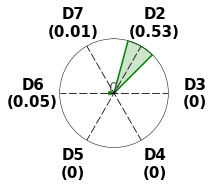

1


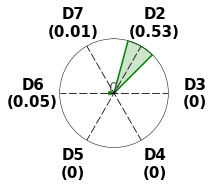

2


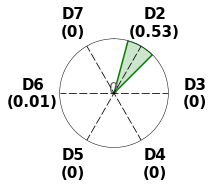

3


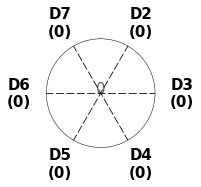

4


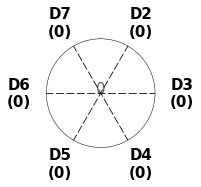

5


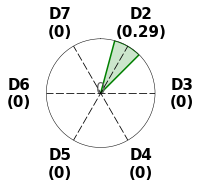

In [14]:
for i in range(0,6):
    name = ['D2', 'D3','D4', 'D5', 'D6', 'D7']
    value = d1.iloc[i,:-2].to_list()
    non_zero = []
    for j in value:
          if j >0:
               non_zero.append(j)
          else:
               non_zero.append(0)

    max = np.max(non_zero)
    min = 0
    if max ==0:
         non_zero = [1,1,1,1,1,1]
    group = name.copy()
    df = pd.DataFrame({'name':name,'value':non_zero, 'group':group})
    print(i)
    radar(df, name,non_zero, group, min, max,i, dataset=1)


# D2

0


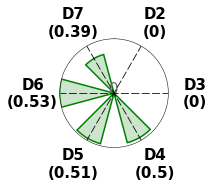

1


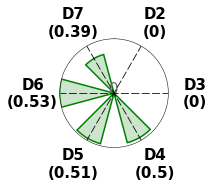

2


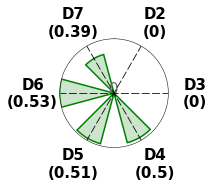

3


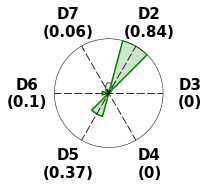

4


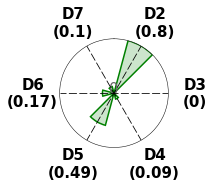

5


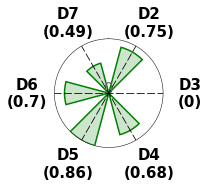

In [15]:
for i in range(0,6):
    name = ['D2', 'D3','D4', 'D5', 'D6', 'D7']
    value = d2.iloc[i,:-2].to_list()
    non_zero = []
    for j in value:
          if j >0:
               non_zero.append(j)
          else:
               non_zero.append(0)

    max = np.max(non_zero)
    min = 0
    if max ==0:
         non_zero = [1,1,1,1,1,1]
    group = name.copy()
    df = pd.DataFrame({'name':name,'value':non_zero, 'group':group})
    print(i)
    radar(df, name,non_zero, group, min, max,i, dataset=2)


# D3

0


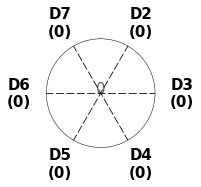

1


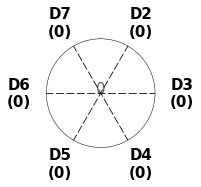

2


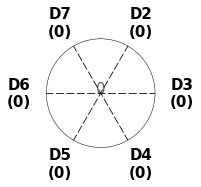

3


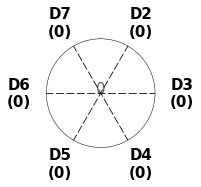

4


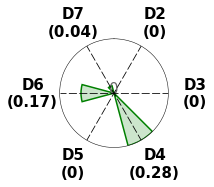

5


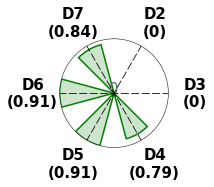

In [16]:
for i in range(0,6):
    name = ['D2', 'D3','D4', 'D5', 'D6', 'D7']
    value = d3.iloc[i,:-2].to_list()
    non_zero = []
    for j in value:
          if j >0:
               non_zero.append(j)
          else:
               non_zero.append(0)

    max = np.max(non_zero)
    min = 0
    if max ==0:
         non_zero = [1,1,1,1,1,1]
    group = name.copy()
    df = pd.DataFrame({'name':name,'value':non_zero, 'group':group})
    print(i)
    radar(df, name,non_zero, group, min, max,i, dataset=3)


# D4

0


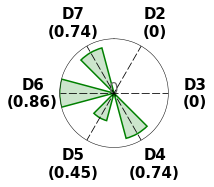

1


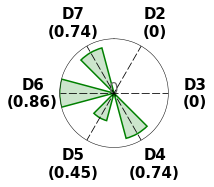

2


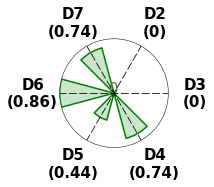

3


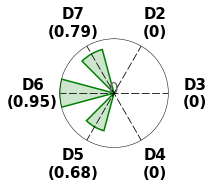

4


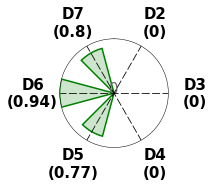

5


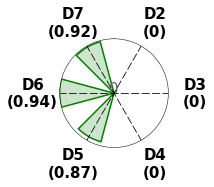

In [17]:
for i in range(0,6):
    name = ['D2', 'D3','D4', 'D5', 'D6', 'D7']
    value = d4.iloc[i,:-2].to_list()
    non_zero = []
    for j in value:
          if j >0:
               non_zero.append(j)
          else:
               non_zero.append(0)

    max = np.max(non_zero)
    min = 0
    if max ==0:
         non_zero = [1,1,1,1,1,1]
    group = name.copy()
    df = pd.DataFrame({'name':name,'value':non_zero, 'group':group})
    print(i)
    radar(df, name,non_zero, group, min, max,i, dataset=4)


# D5

0


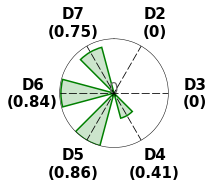

1


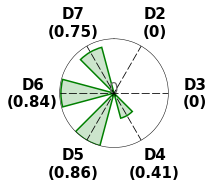

2


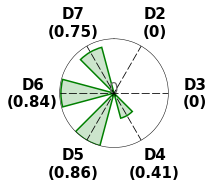

3


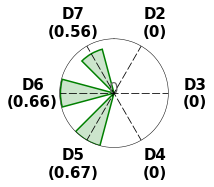

4


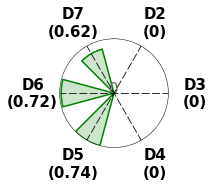

5


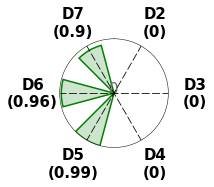

In [18]:
for i in range(0,6):
    name = ['D2', 'D3','D4', 'D5', 'D6', 'D7']
    value = d5.iloc[i,:-2].to_list()
    non_zero = []
    for j in value:
          if j >0:
               non_zero.append(j)
          else:
               non_zero.append(0)

    max = np.max(non_zero)
    min = 0
    if max ==0:
         non_zero = [1,1,1,1,1,1]
    group = name.copy()
    df = pd.DataFrame({'name':name,'value':non_zero, 'group':group})
    print(i)
    radar(df, name,non_zero, group, min, max,i, dataset=5)

# D6

0


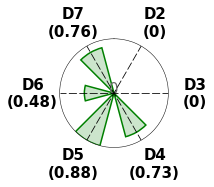

1


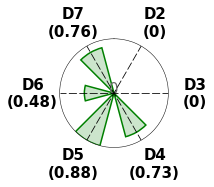

2


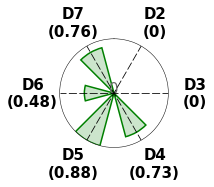

3


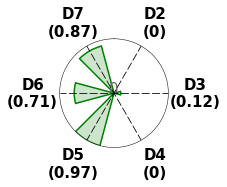

4


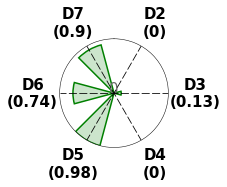

5


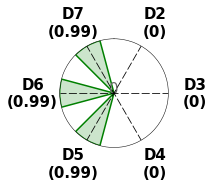

In [19]:
for i in range(0,6):
    name = ['D2', 'D3','D4', 'D5', 'D6', 'D7']
    value = d6.iloc[i,:-2].to_list()
    non_zero = []
    for j in value:
          if j >0:
               non_zero.append(j)
          else:
               non_zero.append(0)

    max = np.max(non_zero)
    min = 0
    if max ==0:
         non_zero = [1,1,1,1,1,1]
    group = name.copy()
    df = pd.DataFrame({'name':name,'value':non_zero, 'group':group})
    print(i)
    radar(df, name,non_zero, group, min, max,i, dataset=6)


# D7

0


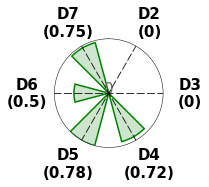

1


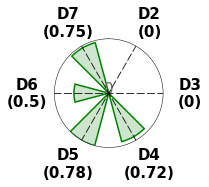

2


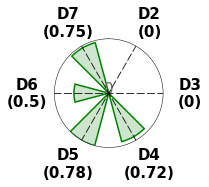

3


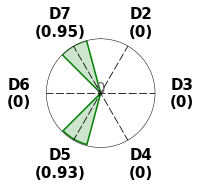

4


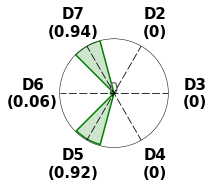

5


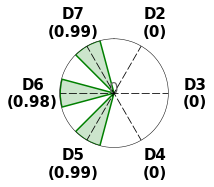

In [20]:
for i in range(0,6):
    name = ['D2', 'D3','D4', 'D5', 'D6', 'D7']
    value = d7.iloc[i,:-2].to_list()
    non_zero = []
    for j in value:
          if j >0:
               non_zero.append(j)
          else:
               non_zero.append(0)

    max = np.max(non_zero)
    min = 0
    if max ==0:
         non_zero = [1,1,1,1,1,1]
    group = name.copy()
    df = pd.DataFrame({'name':name,'value':non_zero, 'group':group})
    print(i)
    radar(df, name,non_zero, group, min, max,i, dataset=7)

# D 237

In [ ]:
for i in range(0,6):
    name = ['D1', 'D4','D5', 'D6']
    value = d237.iloc[i,:-2].to_list()
    non_zero = []
    for j in value:
          if j >0:
               non_zero.append(j)
          else:
               non_zero.append(0)

    max = np.max(non_zero)
    min = 0
    if max ==0:
         non_zero = [1,1,1,1,1,1]
    group = name.copy()
    df = pd.DataFrame({'name':name,'value':non_zero, 'group':group})
    print(i)
    radar237(df, name,non_zero, group, min, max,i, dataset=8)

# Ploting for schematic

In [ ]:
def radar(df, name,value, group,min, max,i, dataset):
    PAD = 1   # represents the number of empty bars between differetn classes of bars. Set to 0, if only 1 class of bars
    ANGLES = np.linspace(0, 2 * np.pi, len(df), endpoint=False)
    VALUES = df["value"].values
    LABELS = df["name"].values
    OFFSET = np.pi / 2   # can keep 1.2 * np.pi / 2 for continious plot
    GROUP = df["group"].values
    ANGLES_N = len(VALUES) + PAD * len(np.unique(GROUP))
    ANGLES = np.linspace(0, 2 * np.pi, num=ANGLES_N, endpoint=False)
    WIDTH = (2 * np.pi) / len(ANGLES)
    GROUPS_SIZE = [len(i[1]) for i in df.groupby("group")]
    offset = 0
    IDXS = []
    for size in GROUPS_SIZE:
        IDXS += list(range(offset + PAD, offset + size + PAD))
        offset += size + PAD
    _=fig, ax = plt.subplots(figsize=(2,2), subplot_kw={"projection": "polar"})
    _=fig.patch.set_facecolor("white")
    _=ax.set_facecolor("white")
    _=ax.set_theta_offset(OFFSET)

    ############# change direction of angles to clockwise 
    theta_direction = ax.set_theta_direction(-1)

    ############### If no X and Y labels are required, pass empty list
    _= ax.set_xticks([])
    _= ax.set_yticks([])

    ###########Use different colors for each group of bar
    GROUPS_SIZE = [len(i[1]) for i in df.groupby("group")]
    COLORS = ['green' if value[i] >0 else 'red' for i in range(len(value))]
    # COLORS = ['green' for i in range(5)]+['red' for i in range(5)]+ ['blue' for i in range(5)]
    ########### Ploting the bars
    _=ax.bar(
        ANGLES[IDXS], VALUES, width=WIDTH, color='white', 
        edgecolor=COLORS, linewidth=1.5, alpha = 1, zorder = 1   # keep zorder highest so that bar lies above the gridlines
    )
    _=ax.bar(
        ANGLES[IDXS], VALUES, width=WIDTH, color=COLORS, 
        edgecolor=COLORS, linewidth=0, alpha = 0.2, zorder = 2   # keep zorder highest so that bar lies above the gridlines
    )
    offset
    ################### Add label to each bar individually at its top,    its padding given in the function itself
    # add_labels(ANGLES[IDXS], VALUES, VALUES, OFFSET, ax)

    ################## Add arch below each arch for separating the group
    # offset = 0 
    # for group, size in zip(["A", "B", "C"], GROUPS_SIZE):
    #     # Add line below bars
    #     x1 = np.linspace(ANGLES[offset + PAD], ANGLES[offset + size + PAD - 1], num=50)
    #     ax.plot(x1, [-0.5] * 50, color="#333333")
        
    ###############Add text to indicate group within the inner circle 
    #     _=ax.text(
    #         np.mean(x1), -2, group, color="#333333", fontsize=s, 
    #         fontweight="normal", ha="center", va="center"
    #     )

    ############### Adding vertial line along polar diredtiion
    _=ax.vlines(ANGLES[IDXS], min,max, color='black', ls=(5,(10,3)), zorder=10, linewidth =0.8)

    ###### Adding x labels on ANGLES along the outer circumferene

    # _= ax.set_xticks(ANGLES[IDXS])

    # LABELS = [f'{group[0]}\n({value[0]})',f'{group[1]}\n({value[1]})', f'{group[2]}\n({value[2]})', f'{group[3]}\n({value[3]})', f'{group[4]}\n({value[4]})', f'{group[5]}\n({value[5]})' ]
    # # LABELS = [f'{group[0]}\n({value[0]})',f'{group[1]}\n({value[1]})', f'{group[2]}\n({value[2]})', f'{group[3]}\n({value[3]})']
    # _= ax.set_xticklabels(LABELS, size=15, fontweight = 'bold')
    # XTICKS = ax.xaxis.get_major_ticks()
    # for tick in XTICKS:
    #     _=tick.set_pad(16.5)


    ###############   y label settings
    _=ax.set_frame_on(True)
    matplotlib.rcParams['axes.linewidth'] = 0.5  # spine(frame) width
    _=ax.spines["polar"].set_color("black")  # outer most reference line on spine when frame on is True
    _=ax.set_ylim(min,max)
    _=ax.xaxis.grid(False)
    _=ax.yaxis.grid(True,linestyle = '-', linewidth = 1)#, linestyle = '--', linewidth = 1 # sets referece lines along y direction #

    ########## inbuilt y ticks
    # _= ax.set_yticklabels([])
    # _= ax.set_xticklabels([])
    X = [0]
    _= ax.set_yticks(X,X, fontsize = 0, fontweight = 'normal', zorder =0)  # Ads a referece circle on y tick values when y axis grid is turned True. Font = 0 for only showing the circle

    ######  custom y ticks on any radial lline
    _= PAD = 1
    _= ax.text(0, 0 , "0", ha="center", size=15, fontweight = 'normal', zorder = 3, color = 'dimgray')  # custon labels to y ticks (reference lines of grid)
    # _= ax.text(-0.2 * np.pi / 2, 10 + PAD, "10", ha="center", size=12)
    # _= ax.text(-0.2 * np.pi / 2, 20 + PAD, "20", ha="center", size=12)

    plt.savefig(f'./notebook_figures/Schematic/radar.tiff',format='tiff', dpi=1200)

    _=plt.show()

i =3
name = ['D1', 'D2','D3','D4', 'D5', 'D7']
value = d6.iloc[i,:-2].to_list()
if d6.iloc[i,-1] >=0:
        max = d6.iloc[i,-1] 
else:
        max = 0
min = d6.iloc[i,-2]
group = name.copy()
df = pd.DataFrame({'name':name,'value':value, 'group':group})
print(i)
radar(df, name,value, group, min, max,i, dataset=6)

